# Notebook for QPQ9 stacking

In [1]:
%matplotlib inline

In [1]:
# imports
import qpq9_analy as qpa

from scipy.interpolate import InterpolatedUnivariateSpline, interp1d


import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

from xastropy.plotting import utils as xputils

from matplotlib import pyplot as plt

## Read QPQ9

In [2]:
qpq9 = QTable.read('qpq9_final.fits')
len(qpq9)

32

In [3]:
cols = ['NAME', 'LYA_FILE', 'ZFG_LINE', 'FG_ZIR', 'FG_SIG_ZIR', 'R_PHYS', 'BG_Z']
qpq9[cols][0:5]

NAME,LYA_FILE,ZFG_LINE,FG_ZIR,FG_SIG_ZIR,R_PHYS,BG_Z
,,,,km / s,kpc,
string112,string312,string288,float64,float32,float64,float64
BOSSJ0057-0001,SDSSJ005718.90-000134.7.fits,[OIII],2.16085586032,44.0 km / s,270.712499511 kpc,2.51139140129
BOSSJ0225+0048,SDSSJ022519.50+004823.7_F.fits.gz,[OII],2.71900010109,-1.0 km / s,225.711728565 kpc,2.81952381134
APOJ0800+3542,SDSSJ080048.74+354231.3_b1200_F.fits.gz,[OIII],1.98231124769,44.0 km / s,200.727334478 kpc,2.06590008736
APOJ0837+3837,SDSSJ083757.13+383722.4_b1200_F.fits.gz,H$\alpha$,2.06242066408,109.0 km / s,89.2255343659 kpc,2.25099992752
BOSSJ0841+3921,SDSSJ084159.26+392140.0_b1200_F.fits.gz,[OIII],2.04117606611,44.0 km / s,182.693675263 kpc,2.21369838715


## Vanilla (interpolation + average/median)

### At Ly$\alpha$

In [4]:
wrest = 1215.6701 * u.AA

In [6]:
# Cut on Lyb
reload(qpa)
msk = qpa.cut_sample(qpq9,wrest,3)
print('Size of QPQ9 sample is {:d}'.format(len(np.where(msk == True)[0])))
qpq9[cols][msk]

Size of QPQ9 sample is 21


array([ True, False,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True], dtype=bool)

In [7]:
# Stack
reload(qpa)
lya_velo,lya_fx,_ = qpa.stack_avg((qpq9[msk],wrest))#,debug=True)

No spectrum found for BOSSJ0057-0001!
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
Using /Users/joe/Dropbox//QSOPairs/data/MAGE_redux/SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
Using /Users/joe/Dropbox//QSOPairs/data/MAGE_redux/SDSSJ091046.69+041448.4_F.fits.gz for APOJ0910+0414
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ091430.85+010927.5_b1200_F.fits.gz for BOSSJ0914+0109
Using /Users/joe/Dropbox//QSOPairs/data/MAGE_redux/SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ093804.84+531743.0_b1200_F.fits.gz for APOJ0938+5317
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ100627.10+480429.9_b1200_F.fits.gz for BOSSJ1006+4804
Using /Users/joe/Dropbox//QSOPairs/data/ESI_redux/SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
U

/Users/joe/python/linetools/linetools/spectra/io.py:290: UserWarning: WARNING: CDELT1 < 1e-4, Assuming log wavelength scale
  warnings.warn('WARNING: CDELT1 < 1e-4, Assuming log wavelength scale')


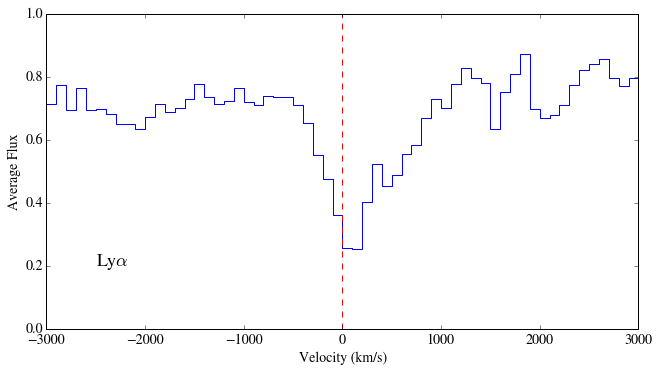

In [8]:
%matplotlib inline
# Plot
plt.figure(figsize=(9, 5),dpi=800)
plt.clf()
gs = gridspec.GridSpec(1,1)

# Axis
ax = plt.subplot(gs[0,0])
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Average Flux')
#ax.set_xlim(xrnge)
yrnge = (0., 1.)
ax.set_ylim(yrnge)

# Data
ax.plot(lya_velo, lya_fx, drawstyle='steps')

# zero line
ax.plot( [0.]*2, yrnge, 'r--')

# Label
ax.text(-2500., 0.2, r'Ly$\alpha$', size=18.)

# Font size
xputils.set_fontsize(ax,14.)

# Layout and save
plt.tight_layout(pad=0.2,h_pad=0.,w_pad=0.1)
plt.savefig('lyastack_1.0.pdf')
plt.show()
plt.close()

### CII 1334

In [9]:
wrest = 1334.5323 * u.AA

In [10]:
# Cut on Lyb
reload(qpa)
msk = qpa.cut_sample(qpq9,wrest,3)
print('Size of QPQ9 sample is {:d}'.format(len(np.where(msk == True)[0])))
qpq9[cols][msk]

Size of QPQ9 sample is 21


NAME,LYA_FILE,ZFG_LINE,FG_ZIR,FG_SIG_ZIR,R_PHYS,BG_Z
,,,,km / s,kpc,
string112,string312,string288,float64,float32,float64,float64
BOSSJ0057-0001,SDSSJ005718.90-000134.7.fits,[OIII],2.16085586032,44.0 km / s,270.712499511 kpc,2.51139140129
APOJ0800+3542,SDSSJ080048.74+354231.3_b1200_F.fits.gz,[OIII],1.98231124769,44.0 km / s,200.727334478 kpc,2.06590008736
BOSSJ0841+3921,SDSSJ084159.26+392140.0_b1200_F.fits.gz,[OIII],2.04117606611,44.0 km / s,182.693675263 kpc,2.21369838715
BOSSJ0853-0011,SDSSJ085357.49-001106.1_F.fits.gz,[OIII],2.40137010963,44.0 km / s,111.641532541 kpc,2.57923269272
APOJ0910+0414,SDSSJ091046.69+041448.4_F.fits.gz,[OIII],2.04589174873,44.0 km / s,95.3714964791 kpc,2.37700009346
BOSSJ0914+0109,SDSSJ091430.85+010927.5_b1200_F.fits.gz,[OIII],2.14020345837,44.0 km / s,199.204801066 kpc,2.4754948616
APOJ0932+0925,SDSSJ093225.60+092500.2_F.fits.gz,[OIII],2.41699563207,44.0 km / s,237.906701175 kpc,2.60199999809
APOJ0938+5317,SDSSJ093804.84+531743.0_b1200_F.fits.gz,[OIII],2.06702972987,44.0 km / s,48.5403931709 kpc,2.32299995422


In [11]:
# Stack
#%gui qt
reload(qpa)
# The following may hit a stop on a bad continuum
CII_velo,CII_fx,_ = qpa.stack_avg((qpq9[msk],wrest))#,debug=True)

No spectrum found for BOSSJ0057-0001!
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
Using /Users/joe/Dropbox//QSOPairs/data/MAGE_redux/SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
No continuum: /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ091046.69+041448.4_b1200_F_c.fits
Using /Users/joe/Dropbox//QSOPairs/data/MAGE_redux/SDSSJ091046.69+041448.4_F.fits.gz for APOJ0910+0414
No spectrum found for BOSSJ0914+0109!
Using /Users/joe/Dropbox//QSOPairs/data/MAGE_redux/SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
Using /Users/joe/Dropbox//QSOPairs/data/LRIS_redux/SDSSJ093804.84+531743.0_b1200_F.fits.gz for APOJ0938+5317
No spectrum found for BOSSJ1006+4804!
Using /Users/joe/Dropbox//QSOPairs/data/ESI_redux/SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
Using /Users/joe/Dropbox//QSOPairs/data/ESI_red

In [12]:
CII_velo

<Quantity [-3000.,-2900.,-2800.,-2700.,-2600.,-2500.,-2400.,-2300.,-2200.,
           -2100.,-2000.,-1900.,-1800.,-1700.,-1600.,-1500.,-1400.,-1300.,
           -1200.,-1100.,-1000., -900., -800., -700., -600., -500., -400.,
            -300., -200., -100.,    0.,  100.,  200.,  300.,  400.,  500.,
             600.,  700.,  800.,  900., 1000., 1100., 1200., 1300., 1400.,
            1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300.,
            2400., 2500., 2600., 2700., 2800., 2900., 3000.] km / s>